In [1]:
# Import required libraries for data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import shap
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr

In [2]:
#Import sklearn classifiers
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Import library to oversample 
from imblearn.over_sampling import RandomOverSampler

In [4]:
#Import RDKit and Mordred libraries
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors

In [5]:
#Allows figures to be visualized in jupyter notebook
%matplotlib inline

In [6]:
#Functions used in the study

#Get Mordred calcs
def get_Mordred(data_input):
    # Assigns Reactants Mordred Info
    reactants = data_input['Substrate']
    
    reactants_mol_list = []
    for inChi_reactants in reactants:
      reactants_mol = Chem.MolFromInchi(inChi_reactants)
      reactants_mol_list.append(reactants_mol)

    # Puts reactants into Pandas Type
    reactant_data = []
    reactant_data = calc.pandas(reactants_mol_list)
       
    #Joins Mordred parameters with experimental, atomic charges, and JChem for Excel parameters
    add_reactants = pd.concat((data_input, reactant_data), axis=1)
    
    #Force any non-numeric entries as NaN and replace them with 0
    int_data = add_reactants.apply(pd.to_numeric, errors='coerce')
    
    output = int_data.fillna(0)#, inplace=True)

    return output


In [7]:
# Sets Pandas Display to Monitor Code
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 200)

In [8]:
# Create Mordred Calculator
calc = Calculator(descriptors, ignore_3D=True)

In [9]:
# Read Training/Test data input File
data = pd.read_csv('BorylationTrainingTest 9-26-24.csv')
data = get_Mordred(data)
index_val = [35,36,37,38,57,58,59,60,61,62,65,66,79,80,81,82,83,84,114,115,116,117,118,119,120,121,122,123,188,189,190,191,
192,193,194,195,215,216,217,218,219,220,221,227,228,229,230,231,232,233,234,250,251,252,
253,254,295,296,297,298,299,300,301,360,361,362,378,379,380,381,382,412,413,414,415,416,
473,474,475,497,498,499,500,501,502,503,504,505,506,507,508,509,510,585,586,587,588,589,
590,591,592,593,594,609,610,611,612,613,614,615,638,639,640,641,642,643,644,645,664,665,
686,687,688,689,690,691,692,693,694,713,714,715,716,717,718,719,720,721,737,738,739,783,
784,785,786,787,791,792,793,830,831,832,833,834,835,836,837,838,846,847,848,849,850,883,
884,885,886,887,888,889,890,891,892,893,894,895,896,901,902,903,904,905,956,957,958,981,
982,983,984,985,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,]

training_data = data.loc[~data.index.isin(index_val)]
test_data = data.iloc[index_val]
test_data

100%|██████████| 1027/1027 [01:41<00:00, 10.14it/s]


Substrate  Product  Boronic Ester  Active Catalyst-Ligand  Catalyst  \
35          0.0      0.0              2                       3         6   
36          0.0      0.0              2                       3         6   
37          0.0      0.0              2                       3         6   
38          0.0      0.0              2                       3         6   
57          0.0      0.0              2                       3         6   
...         ...      ...            ...                     ...       ...   
1013        0.0      0.0              2                       2         6   
1014        0.0      0.0              2                       9         6   
1015        0.0      0.0              2                       9         6   
1016        0.0      0.0              2                       9         6   
1017        0.0      0.0              2                       9         6   

      Ligand  Buried_Vol  PyramidalizationAR  PyramidalizationG    SASA_area  \
35         4        19.1            1.003400           9.657123   970.721548   
36         4        19.1            1.003400           9.657123   970.721548   
37         4        19.1            1.003400           9.657123   970.721548   
38         4        19.1            1.003400           9.657123   970.721548   
57         4        19.1            1.003400           9.657123   970.721548   
...      ...         ...                 ...                ...          ...   
1013       2        31.3            1.007407          10.075073   972.463649   
1014       8        42.3            1.012144          10.256185  1036.235700   
1015       8        42.3            1.012144          10.256185  1036.235700   
1016       8        42.3            1.012144          10.256185  1036.235700   
1017       8        42.3            1.012144          10.256185  1036.235700   

         SASA_vol  Sterimol_L  SterimolB_1  Sterimol_B_5  Buried_Sterimol_L  \
35    1840.759013   12.674167     4.395741      7.494821           7.934411   
36    1840.759013   12.674167     4.395741      7.494821           7.934411   
37    1840.759013   12.674167     4.395741      7.494821           7.934411   
38    1840.759013   12.674167     4.395741      7.494821           7.934411   
57    1840.759013   12.674167     4.395741      7.494821           7.934411   
...           ...         ...          ...           ...                ...   
1013  1848.059175    9.796551     4.455058      9.176850           7.039666   
1014  2245.188275    9.288860     5.534178      8.337794           7.821149   
1015  2245.188275    9.288860     5.534178      8.337794           7.821149   
1016  2245.188275    9.288860     5.534178      8.337794           7.821149   
1017  2245.188275    9.288860     5.534178      8.337794           7.821149   

      Buried_SterimolB_1  Buried_Sterimol_B_5  Hirshfeld Heavy Atom Charge  \
35              3.760918             7.174280                     0.016742   
36              3.760918             7.174280                    -0.003995   
37              3.760918             7.174280                     0.140464   
38              3.760918             7.174280                     0.136930   
57              3.760918             7.174280                     0.006082   
...                  ...                  ...                          ...   
1013            4.368735             7.203241                    -0.001407   
1014            5.356499             8.012947                    -0.028472   
1015            5.356499             8.012947                    -0.008565   
1016            5.356499             8.012947                     0.049445   
1017            5.356499             8.012947                     0.093649   

      CM5 Charge  Hirshfeld Carbon Charge  Hirshfeld Hydrogen Charge  \
35      0.026805                -0.033268                   0.050010   
36      0.005300                -0.057950                   0.053954   
37      0.196895  

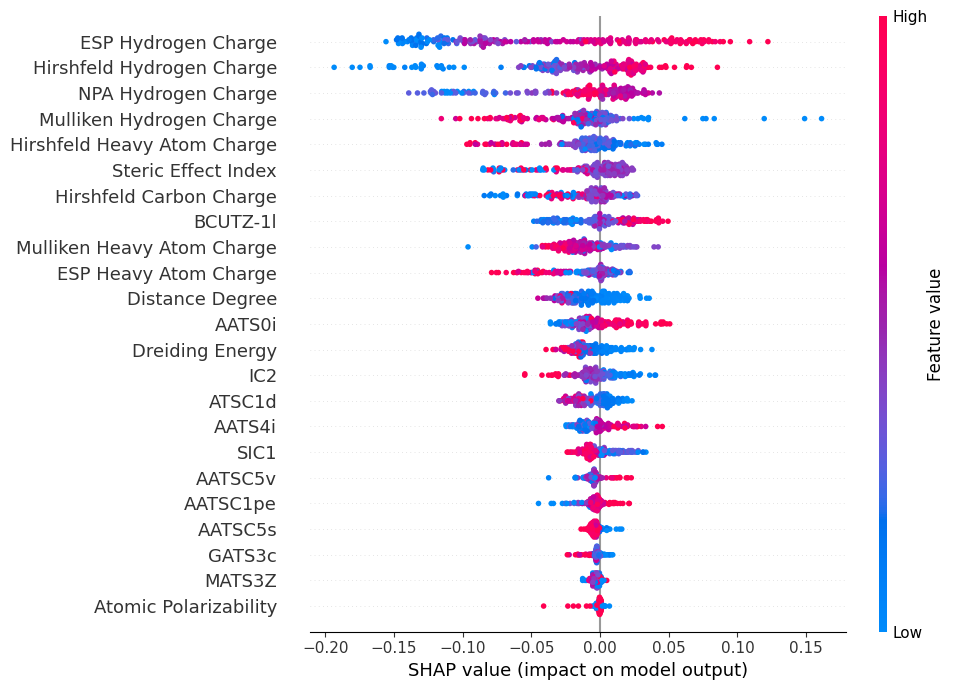

In [10]:
#Code for original dataset SHAP plot

final_selected_features = ['Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge', 'ESP Hydrogen Charge', 
                           'NPA Hydrogen Charge', 'Mulliken Heavy Charge', 'Mulliken Hydrogen Charge', 'Steric Effect Index', 'Atomic_Polarizability', 'Distance Degree', 'Dreiding Energy', 'AATS0i', 'AATS4i', 
                           'ATSC1d', 'AATSC5s', 'AATSC5v', 'AATSC1pe', 'MATS3Z', 'GATS3c', 'BCUTZ-1l', 'IC2', 'SIC1']


# Seperate dataset as response variable (Product Ratio) and feature variables
#Note: Product Ratio is described as "0" for non-borylating sites and "1" for borylating sites
training_X = training_data.drop('Product_Ratio' , axis = 1)
training_y = training_data['Product_Ratio']
test_XFull = test_data.drop('Product_Ratio' , axis = 1)
test_y = test_data['Product_Ratio']
   
#Apply over-sampling to training set
ros = RandomOverSampler(random_state=10)
X_resampled, y_resampled = ros.fit_resample(training_X, training_y)    
X_train = X_resampled[final_selected_features]
X_train = X_train.rename(columns = {'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge':'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 
                        'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'NPA Hydrogen Charge':'NPA Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge':'Mulliken Hydrogen Charge', 
                        'Steric Effect Index':'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability', 'Distance Degree':'Distance Degree', 'Dreiding Energy':'Dreiding Energy', 
                        'AATS0i':'AATS0i', 'AATS4i':'AATS4i', 'ATSC1d':'ATSC1d', 'AATSC5s':'AATSC5s', 'AATSC5v':'AATSC5v', 'AATSC1pe':'AATSC1pe', 'MATS3Z':'MATS3Z', 'GATS3c':'GATS3c', 'BCUTZ-1l':'BCUTZ-1l', 'IC2':'IC2', 'SIC1':'SIC1'})
                            
test_XFull = test_XFull[final_selected_features]
test_XFull = test_XFull.rename(columns = {'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge':'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 
                        'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'NPA Hydrogen Charge':'NPA Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge':'Mulliken Hydrogen Charge', 
                        'Steric Effect Index':'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability', 'Distance Degree':'Distance Degree', 'Dreiding Energy':'Dreiding Energy', 
                        'AATS0i':'AATS0i', 'AATS4i':'AATS4i', 'ATSC1d':'ATSC1d', 'AATSC5s':'AATSC5s', 'AATSC5v':'AATSC5v', 'AATSC1pe':'AATSC1pe', 'MATS3Z':'MATS3Z', 'GATS3c':'GATS3c', 'BCUTZ-1l':'BCUTZ-1l', 'IC2':'IC2', 'SIC1':'SIC1'})
    
# Applies random forest classifier to the dataset
rfc = RandomForestClassifier(n_estimators=800,max_depth=9)
rfc.fit(X_train, y_resampled)

explainerFull = shap.TreeExplainer(rfc)
shap_valuesFull = explainerFull.shap_values(test_XFull)
shap.summary_plot(shap_valuesFull[1], test_XFull, plot_size=(10,7), max_display=test_XFull.shape[1])

100%|██████████| 1087/1087 [01:39<00:00, 10.89it/s]


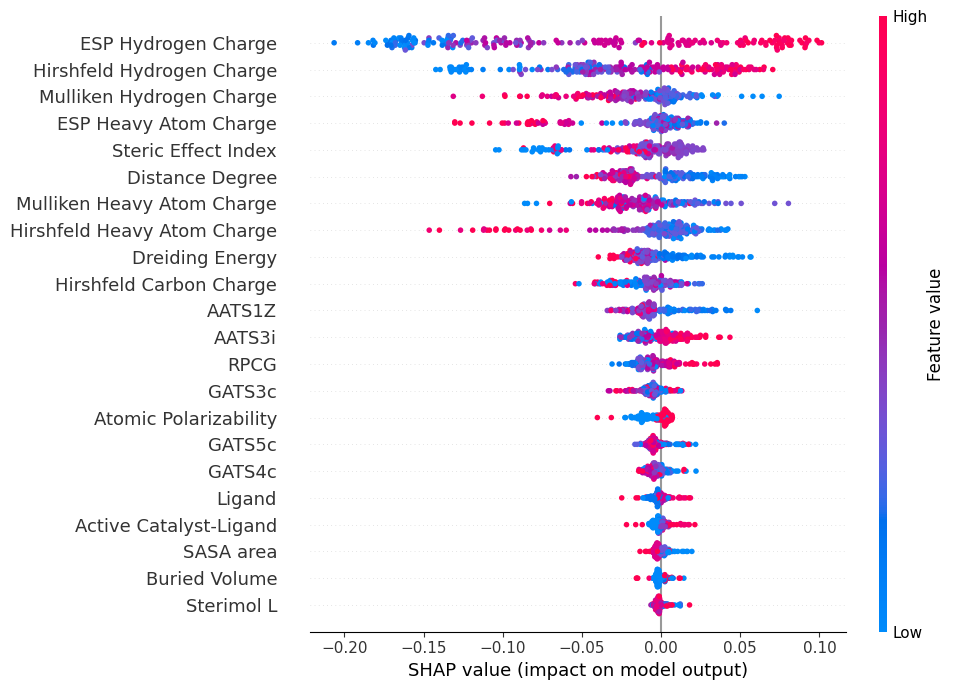

In [11]:
#Code for ligand dataset SHAP plot

#Remove those numbers from analysis data
def filter_rows_by_values1(df, col, values):
    return df[~df[col].isin(values)]

#Remove those numbers from analysis data
def filter_rows_by_values2(df, col, values):
    return df[df[col].isin(values)]

# Read Training/Test data input File
ligand = pd.read_csv('BorylationTrainingTest_ligand 9-26-24.csv')

#group the compounds by numbers
ligand['grouped'] = ligand.groupby('Substrate', sort=False).ngroup()

#Convert substrates to Mordred features
ligand = get_Mordred(ligand)

final_selected_features = ['Active Catalyst-Ligand', 'Ligand', 'Buried_Vol', 'SASA_area', 
                           'Sterimol_L', 'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge', 
                           'ESP Heavy Atom Charge', 'ESP Hydrogen Charge', 'Mulliken Heavy Charge', 'Mulliken Hydrogen Charge', 
                           'Steric Effect Index', 'Atomic_Polarizability', 'Distance Degree', 'Dreiding Energy', 
                           'AATS1Z', 'AATS3i', 'GATS3c', 'GATS4c', 'GATS5c', 'RPCG']

#Get numbers to represent compounds
arr = np.arange(0, 200,  dtype=int)

#Get 20% of numbers, without replacement
set_numbers = np.random.choice(arr, int(len(arr)*0.20), replace=False ) 
    
#Seperate training (80%) and test data (20%)
training_data = filter_rows_by_values1(ligand, "grouped", set_numbers)
test_data = filter_rows_by_values2(ligand, "grouped", set_numbers)

# Seperate dataset as response variable (Product Ratio) and feature variables
#Note: Product Ratio is described as "0" for non-borylating sites and "1" for borylating sites
training_X = training_data.drop('Product_Ratio' , axis = 1)
training_y = training_data['Product_Ratio']
test_XLig = test_data.drop('Product_Ratio' , axis = 1)
test_y = test_data['Product_Ratio']
   
#Apply over-sampling to training set
ros = RandomOverSampler(random_state=10)
X_resampled, y_resampled = ros.fit_resample(training_X, training_y)    
X_train = X_resampled[final_selected_features]
X_train = X_train.rename(columns= {'Active Catalyst-Ligand':'Active Catalyst-Ligand' , 'Ligand': 'Ligand', 'Buried_Vol':'Buried Volume', 'SASA_area': 'SASA area', 
                                   'Sterimol_L': 'Sterimol L', 'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge': 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge',
                                   'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge': 'Mulliken Hydrogen Charge',                                    
                                   'Steric Effect Index': 'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability','Distance Degree': 'Distance Degree', 'Dreiding Energy': 'Dreiding Energy',
                                   'AATS1Z':'AATS1Z', 'AATS3i':'AATS3i', 'GATS3c':'GATS3c', 'GATS4c':'GATS4c', 'GATS5c':'GATS5c', 'RPCG':'RPCG'})
                                   

test_XLig = test_XLig[final_selected_features]
test_XLig = test_XLig.rename(columns= {'Active Catalyst-Ligand':'Active Catalyst-Ligand' , 'Ligand': 'Ligand', 'Buried_Vol':'Buried Volume', 'SASA_area': 'SASA area', 
                                   'Sterimol_L': 'Sterimol L', 'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge': 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge',
                                   'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge': 'Mulliken Hydrogen Charge',                                    
                                   'Steric Effect Index': 'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability','Distance Degree': 'Distance Degree', 'Dreiding Energy': 'Dreiding Energy',
                                   'AATS1Z':'AATS1Z', 'AATS3i':'AATS3i', 'GATS3c':'GATS3c', 'GATS4c':'GATS4c', 'GATS5c':'GATS5c', 'RPCG':'RPCG'})

# Applies random forest classifier to the dataset
rfc = RandomForestClassifier(n_estimators=800,max_depth=9)
rfc.fit(X_train, y_resampled)

explainerLig = shap.TreeExplainer(rfc)
shap_valuesLig = explainerLig.shap_values(test_XLig)
shap.summary_plot(shap_valuesLig[1], test_XLig, plot_size=(10,7),max_display=test_XLig.shape[1])


In [12]:
# Create a 2x2 grid of subplots

plt.figure(figsize=(8,4), dpi = 1000)
plt.subplot(1,2,1)
shap.summary_plot(shap_valuesFull[1], test_XFull,max_display=test_XFull.shape[1], show=False)
plt.subplot(1,2,2)
shap.summary_plot(shap_valuesLig[1], test_XLig, plot_size=(15,8),max_display=test_XLig.shape[1],show=False)
plt.tight_layout()

plt.savefig('SHAPplots10-1.tiff', bbox_inches='tight', dpi = 1200)
plt.show()

In [13]:
final_selected_features = ['Hirshfeld \nHeavy \nAtom\n Charge', 'Hirshfeld \nCarbon\n Charge', 'Hirshfeld\n Hydrogen\n Charge', 'ESP \nHeavy \nAtom\n Charge', 'ESP\n Hydrogen \nCharge', 
                           'NPA\n Hydrogen \nCharge', 'Mulliken\n Heavy\n Charge', 'Mulliken\n Hydrogen\n Charge', 'Steric \nEffect\n Index', 'Atomic_Polarizability', 'Distance\n Degree', 'Dreiding \nEnergy', 'AATS0i', 'AATS4i', 
                           'ATSC1d', 'AATSC5s', 'AATSC5v', 'AATSC1pe', 'MATS3Z', 'GATS3c', 'BCUTZ-1l', 'IC2', 'SIC1']



In [15]:
#1
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][28,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_1_188.jpeg',bbox_inches='tight') 

In [23]:
#2
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][146,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=12,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_2_791.jpeg',bbox_inches='tight', dpi = 100) 

In [24]:
#3
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][177,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_3_901.jpeg',bbox_inches='tight', dpi = 100) 

In [18]:
#4
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][159,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_4_847.jpeg',bbox_inches='tight', dpi = 100) 

In [19]:
#5
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][51,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_5_250.jpeg',bbox_inches='tight', dpi = 100) 

In [20]:
#6
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[0], shap_valuesFull[1][1,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_6_35.jpeg',bbox_inches='tight', dpi = 100) 

In [21]:
#7-Borylating site
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[1], shap_valuesFull[1][110,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_7_638borylatingsite.jpeg',bbox_inches='tight', dpi = 100) 

In [22]:
#7-non Borylating site
import matplotlib.pyplot as plt
import shap

shap.force_plot(explainerFull.expected_value[0], shap_valuesFull[1][111,:],feature_names = final_selected_features, 
                matplotlib=True,show=False,text_rotation=8,figsize=(30, 3),)
plt.rc('font', size=25) 
plt.savefig('force_7_6393nonborylatingsite.jpeg',bbox_inches='tight', dpi = 100) 